In [7]:
import pandas as pd
import numpy as np
import sys
import os

In [8]:
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
from Functions.FNC_Pro import lista_produtos, configurar_credenciais_bq, Base_venda

In [9]:
produtos = lista_produtos('C:/Users/joaop/OneDrive/Desktop/Projetos Git/Forecast vendas e elasticidade/Produtos/Planilha com Impostos.xlsm')
produtos.head()

,ID_Sku
0,74001
1,61580
2,10530
3,18615
4,67857


In [10]:
configurar_credenciais_bq(r'G:Drives compartilhados/Bases BI/epoca-230913-b478a9a0dd4c.json')

Venda = Base_venda('7172')

c:\Users\joaop\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [11]:
Venda.head()

,SKU,Preco,Demanda,Log_Preco,Log_Demanda,Domingo,Quarta-feira,Quinta-feira,Segunda-feira,Sexta-feira,Sábado,Terça-feira,Log_Preco_7D,Log_Demanda_7D
Data,,,,,,,,,,,,,,
2022-09-13,7172,295.63,35,5.689109,3.555348,0,0,0,0,0,0,1,5.689109,3.555348
2022-09-14,7172,288.49,56,5.664660,4.025352,0,1,0,0,0,0,0,5.676959,3.817712
2022-09-15,7172,280.77,52,5.637536,3.951244,0,0,1,0,0,0,0,5.663990,3.864232
2022-09-16,7172,292.32,41,5.677849,3.713572,0,0,0,0,1,0,0,5.667473,3.828641
2022-09-17,7172,288.83,14,5.665838,2.639057,0,0,0,0,0,1,0,5.667146,3.678829


=== AVALIAÇÃO ESTATÍSTICA PARA SKU 7172 ===

1. ESTATÍSTICAS DESCRITIVAS:
           Preco   Demanda  Log_Preco  Log_Demanda  Log_Preco_7D  \
count  1097.0000    1097.0  1097.0000       1097.0     1097.0000   
mean    297.1085   59.3683     5.6884       3.7153        5.6887   
std      31.7328  128.9322     0.1064       0.7648        0.0994   
min     185.3600       1.0     5.2223       1.0986        5.3645   
25%     275.4600      24.0     5.6184       3.1781        5.6219   
50%     292.6800      42.0     5.6791       3.7377        5.6776   
75%     317.5500      69.0     5.7606       4.2341        5.7556   
max     381.0100    3191.0     5.9428       8.0681        5.9173   

       Log_Demanda_7D  
count       1097.0000  
mean           3.8035  
std            0.6774  
min            2.0053  
25%            3.3322  
50%            3.8130  
75%            4.2403  
max            6.9123  


2. VALORES MISSING:
SKU               0
Preco             0
Demanda           0
Log_Preco      

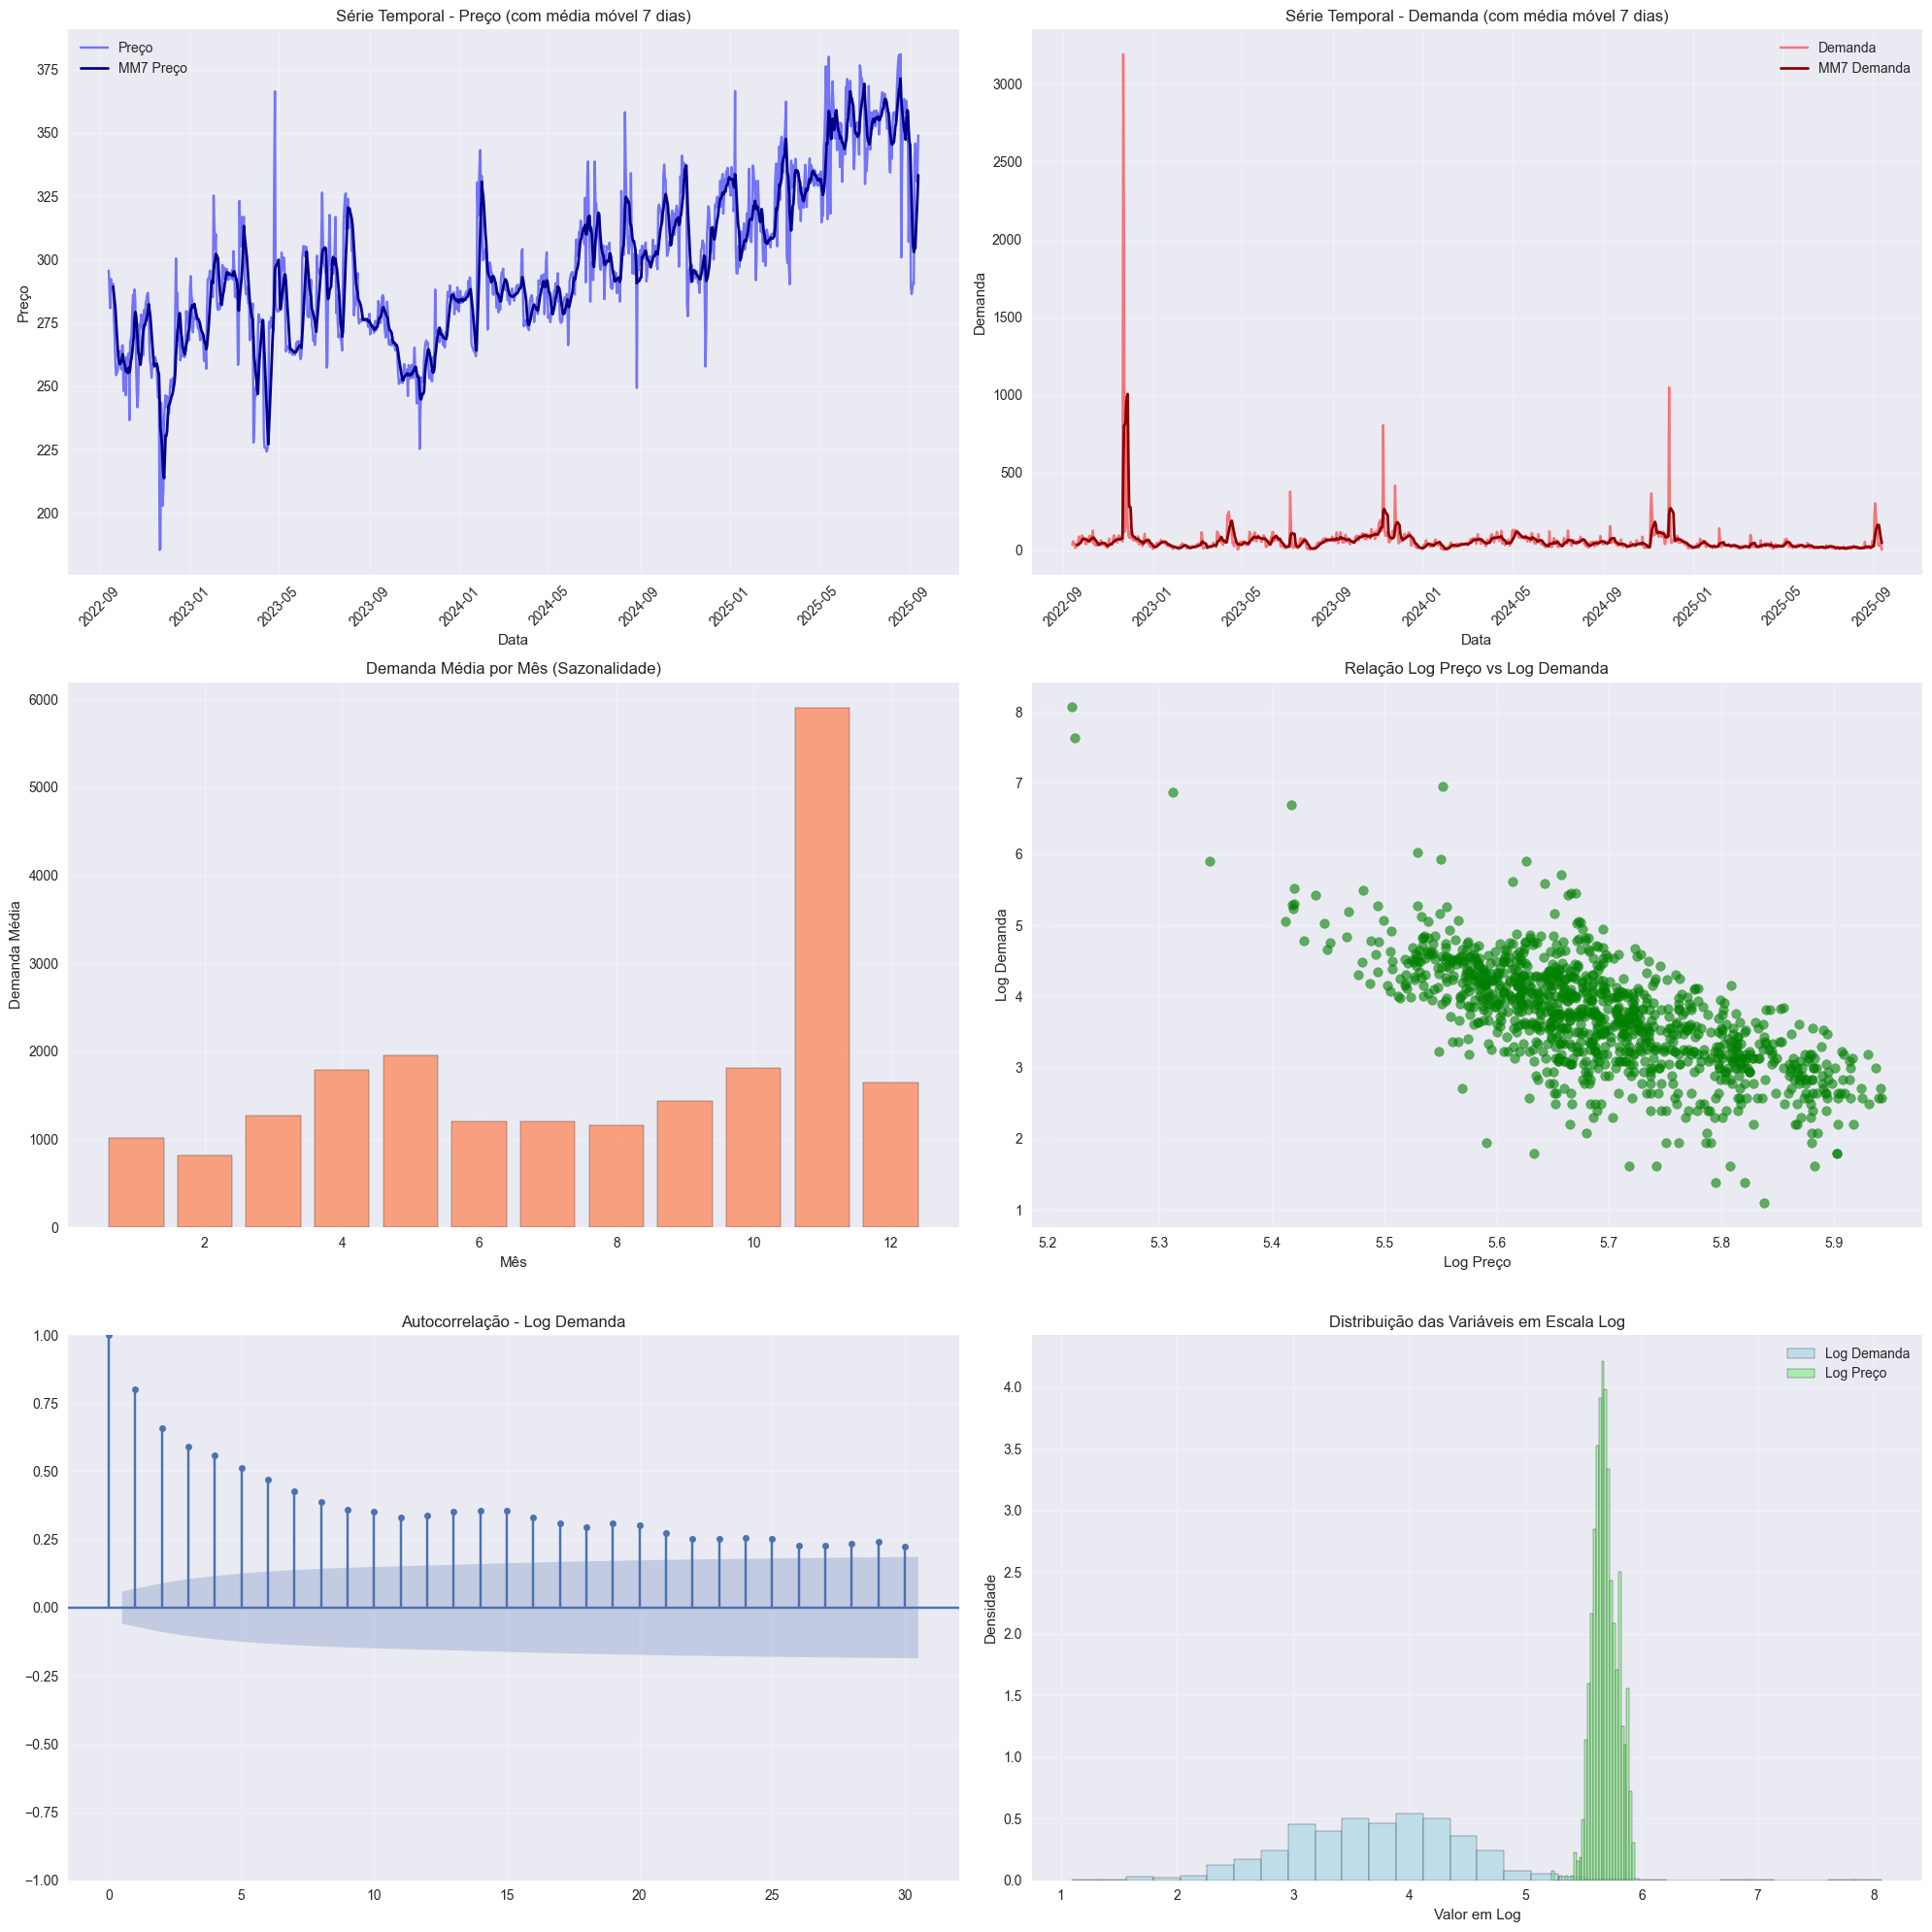

7. ANÁLISE DE SAZONALIDADE POR DIA DA SEMANA:

8. RESUMO E RECOMENDAÇÕES PARA MODELAGEM:
⚠️  VARIÁVEIS NÃO ESTACIONÁRIAS (precisam de transformação):
   - Log_Preco
   - Preco

✅ RECOMENDAÇÃO: Use diferenciação (df.diff()) ou transformações adicionais

📊 Correlação Log_Preco x Log_Demanda: -0.7029
   → Correlação forte - bom preditor

🎯 RECOMENDAÇÕES FINAIS PARA VALIDAÇÃO CRUZADA:
1. TRANSFORME as variáveis não estacionárias antes da modelagem
2. Use diferenciação: df['var_diff'] = df['var'].diff().dropna()
3. Considere testar diferentes ordens de diferenciação
4. Use TimeSeriesSplit do sklearn para validação cruzada temporal
5. Monitore overfitting comparando performance treino/teste
6. Considere modelos SARIMA para capturar sazonalidade

✅ Análise concluída - Dados prontos para modelagem!


(     AnoMes       Preco  Demanda  Log_Preco  Log_Demanda
 0   2022-09  272.360556      985   5.605686     3.887428
 1   2022-10  265.185161     1517   5.579159     3.775728
 2   2022-11  250.664000     8615   5.518190     4.650235
 3   2022-12  263.371613     1767   5.572131     3.920139
 4   2023-01  277.904194     1061   5.626527     3.411263
 5   2023-02  293.394286      591   5.680940     2.949246
 6   2023-03  283.633548     1231   5.644110     3.463641
 7   2023-04  267.952000     2422   5.584716     4.070361
 8   2023-05  272.689677     2154   5.607218     4.179816
 9   2023-06  289.950333     1572   5.668228     3.767679
 10  2023-07  291.666129     1599   5.673398     3.480653
 11  2023-08  289.581290     1422   5.666727     3.592199
 12  2023-09  275.104667     1975   5.616945     4.147224
 13  2023-10  257.608065     2889   5.551188     4.519359
 14  2023-11  257.092333     4539   5.548513     4.801911
 15  2023-12  277.811613     1675   5.626540     3.706341
 16  2024-01  

In [12]:
from Functions.FNC_aval_estat import avaliar_dados_series_temporais

avaliar_dados_series_temporais(Venda,'7172')